In [59]:
import datetime

import frads as fr
import numpy as np
import pyradiance as pr
import matplotlib.pyplot as plt

## Horizontal melanopic lux

### Make another scene

In [45]:
my_scene = pr.Scene(
    "my_scene", 
    surfaces=["Objects/floor.rad", "Objects/walls.rad", "Objects/ceiling.rad"], 
    materials=["Objects/materials.mat"], 
    sources=["Sources/gs_1221_1200.rad", "Sources/sky.rad"]
) 

### Generate grid from floor polygon

In [46]:
floor_primitives = fr.unpack_primitives("Objects/floor.rad")
floor_polygon = fr.parse_polygon(floor_primitives[0])  # taking the 1st primitive
grid = fr.gen_grid(floor_polygon, 1, 0.75)

### Trace

In [50]:
grid_rays = "\n".join(" ".join(map(str, row)) for row in grid)
nband = 20
params = pr.SamplingParameters(
    I=True,
    ab=3,
    ad=64,
    aa=0,
    lw=0.01,
    co=True,
    cs=nband,
)

result = pr.rtrace(grid_rays.encode(), my_scene.octree, params=params.args()+['-pM'], header=False, outform='f')

### Visualize

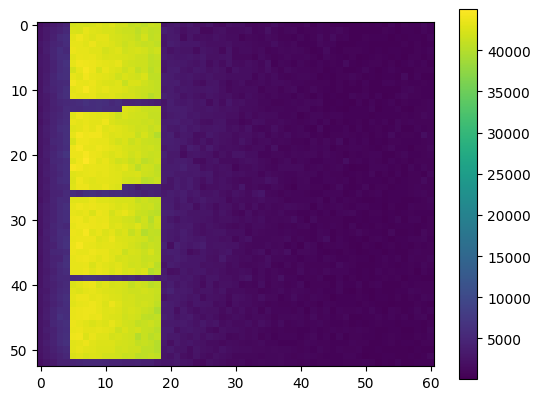

In [61]:
mlux = np.frombuffer(result, dtype=np.single).reshape(53,61)
plt.imshow(mlux)
plt.colorbar()

In [62]:
settings = fr.Settings()
# Edit the number of parallel processes
settings.num_processors = 4

# Provide a wea file
settings.wea_file = "oak.wea"

In [64]:
scene = fr.SceneConfig(
    files=[
    "./Objects/walls.rad",
    "./Objects/ceiling.rad",
    "./Objects/floor.rad",
    ]
)

In [ ]:
window1 = fr.WindowConfig(
    file="window1.rad", # window geomtry primitive file
    matrix_name="window1_matrix" # specified in materials 
)
materials = fr.MaterialConfig(
    files=["materials.mat"], # material primitive file
    matrices={
        "window1_matrix": {"matrix_file": "window1_bsdf.xml"}
        } # window matrix file
)

In [65]:
workflow_config = {
    "settings": {
        "method": "3phase",
        "sky_basis": "r1",
        "epw_file": "",
        "wea_file": "oak.wea",
        "sensor_sky_matrix": ["-ab", "0"],
        "view_sky_matrix": ["-ab", "0"],
        "sensor_window_matrix": ["-ab", "0"],
        "view_window_matrix": ["-ab", "0"],
        "daylight_matrix": ["-ab", "0"],
    },
    "model": {
        "scene": {
            "files": ["walls.rad", "ceiling.rad", "floor.rad", "ground.rad"]
        },
        "windows": {
            "window1": {
                "file": "window1.rad",
                "matrix_name": "window1_matrix",
            }
        },
        "materials": {
            "files": ["materials.mat"],
            "matrices": {"window1_matrix": {"matrix_file": "window1_bsdf.xml"}},
        },
        "sensors": {
            "sensor1": {"file": "sensor1.txt"},
            "view1": {"data": [[1, 1, 1, 0, -1, 0]]},
        },
        "views": {"view1": {"file": "view1.vf"}},
    },
}

In [66]:
cfg = fr.WorkflowConfig.from_dict(workflow_config)

FileNotFoundError: [Errno 2] No such file or directory: 'oak.wea'